In [2]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [3]:
path = '../../../Data/2025/251209_vanillin_UV-Vis/'
data = import_data(path, '', None, None, None)
print(data.keys())

dict_keys(['250630_Actinic_flux_Fløjstrup-Skov', 'NIST_vanillin_UV-vis'])


In [13]:
data['NIST_vanillin_UV-vis']['Epsilon'] = 10**(data['NIST_vanillin_UV-vis']['Logarithm epsilon'])
data['250630_Actinic_flux_Fløjstrup-Skov']['Wavelength'] = (data['250630_Actinic_flux_Fløjstrup-Skov']['LOWER WVL'] + data['250630_Actinic_flux_Fløjstrup-Skov']['UPPER WVL']) / 2

vanillin_mask = (data['NIST_vanillin_UV-vis']['Wavelength (nm)'] >= 280) & (data['NIST_vanillin_UV-vis']['Wavelength (nm)'] <= 351)
flux_mask = (data['250630_Actinic_flux_Fløjstrup-Skov']['Wavelength'] >= 280) & (data['250630_Actinic_flux_Fløjstrup-Skov']['Wavelength'] <= 351)

vanillin_spec = data['NIST_vanillin_UV-vis'][vanillin_mask]
actinic_flux = data['250630_Actinic_flux_Fløjstrup-Skov'][flux_mask]

vanillin_spec_spline = scipy.interpolate.PchipInterpolator(vanillin_spec['Wavelength (nm)'], vanillin_spec['Epsilon'])

actinic_flux['Vanillin epsilon'] = vanillin_spec_spline(actinic_flux['Wavelength'])

display(actinic_flux)

,LOWER WVL,UPPER WVL,DIRECT,DIFFUSE DOWN,DIFFUSE UP,TOTAL,Wavelength,Vanillin epsilon
0,280,281,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,280.5,10136.072394
1,281,282,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,281.5,10093.560648
2,282,283,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,282.5,10038.256364
3,283,284,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,283.5,9968.712709
4,284,285,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,284.5,9903.634195
...,...,...,...,...,...,...,...,...
66,346,347,4.868000e+13,1.019000e+14,1.821000e+13,1.688000e+14,346.5,1206.804547
67,347,348,4.805000e+13,9.943000e+13,1.785000e+13,1.653000e+14,347.5,1048.515259
68,348,349,5.335000e+13,1.091000e+14,1.968000e+13,1.822000e+14,348.5,880.708972
69,349,350,4.516000e+13,9.131000e+13,1.654000e+13,1.530000e+14,349.5,764.947142


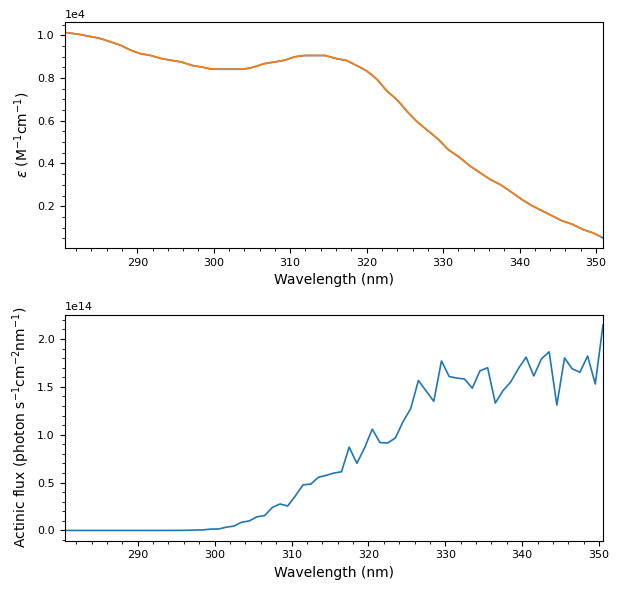

In [16]:
fig, ax = plt.subplots(2, 1, figsize = (6.3, 6))

ax[0].plot(vanillin_spec['Wavelength (nm)'], vanillin_spec['Epsilon'])
ax[0].plot(actinic_flux['Wavelength'], actinic_flux['Vanillin epsilon'])
ax[1].plot(actinic_flux['Wavelength'], actinic_flux['TOTAL'])

ax[0].set(xlabel = 'Wavelength (nm)', ylabel = '$\epsilon$ (M$^{-1}$cm$^{-1}$)')
ax[1].set(xlabel = 'Wavelength (nm)', ylabel = 'Actinic flux (photon s$^{-1}$cm$^{-2}$nm$^{-1}$)')

fig.tight_layout()

In [36]:
def calc_cross_section(epsilon):
    sigma = (1000*epsilon)/((6.022*10**23)*10**3) #epsilon is in L/mol*cm so the multiplication by 1000 is conversion from L to cm**3
    return sigma

def calc_photolysis_rate(actinic_flux, qyield):
    sigma = calc_cross_section(actinic_flux[actinic_flux.keys()[7]])

    I = actinic_flux[actinic_flux.keys()[5]]
    high_wvl = actinic_flux[actinic_flux.keys()[1]].to_numpy()
    low_wvl = actinic_flux[actinic_flux.keys()[0]].to_numpy()
    delta_wvl = np.array(high_wvl-low_wvl)

    j = sigma*qyield*I*delta_wvl
    return j

def plot_photolysis_rate(data, concentrations, vol, qyield):
    photolysis_rate = calc_photolysis_rate(data, qyield)

    ax.plot(data['Wavelength'], photolysis_rate)

    ax.set(xlabel = 'Wavelength (nm)', ylabel = 'Photolysis rate (s$^{-1}$)')

    return

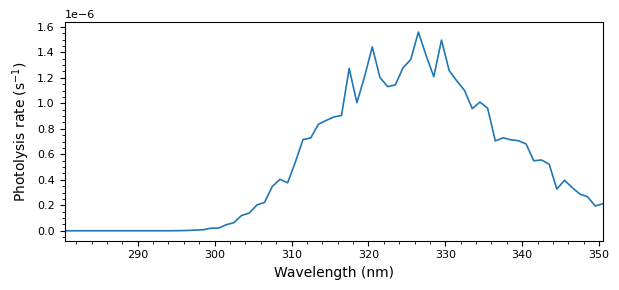

In [37]:
vanillin_conc = np.round(np.arange(0.01, 0.11, 0.01), 3)

fig, ax = plt.subplots(figsize = (6.3, 3))

plot_photolysis_rate(actinic_flux, vanillin_conc, 0.5, 1)

fig.tight_layout()